In [18]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd

In [19]:
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 

# Combine the features and target into one DataFrame
df = pd.concat([X, y], axis=1)
df.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


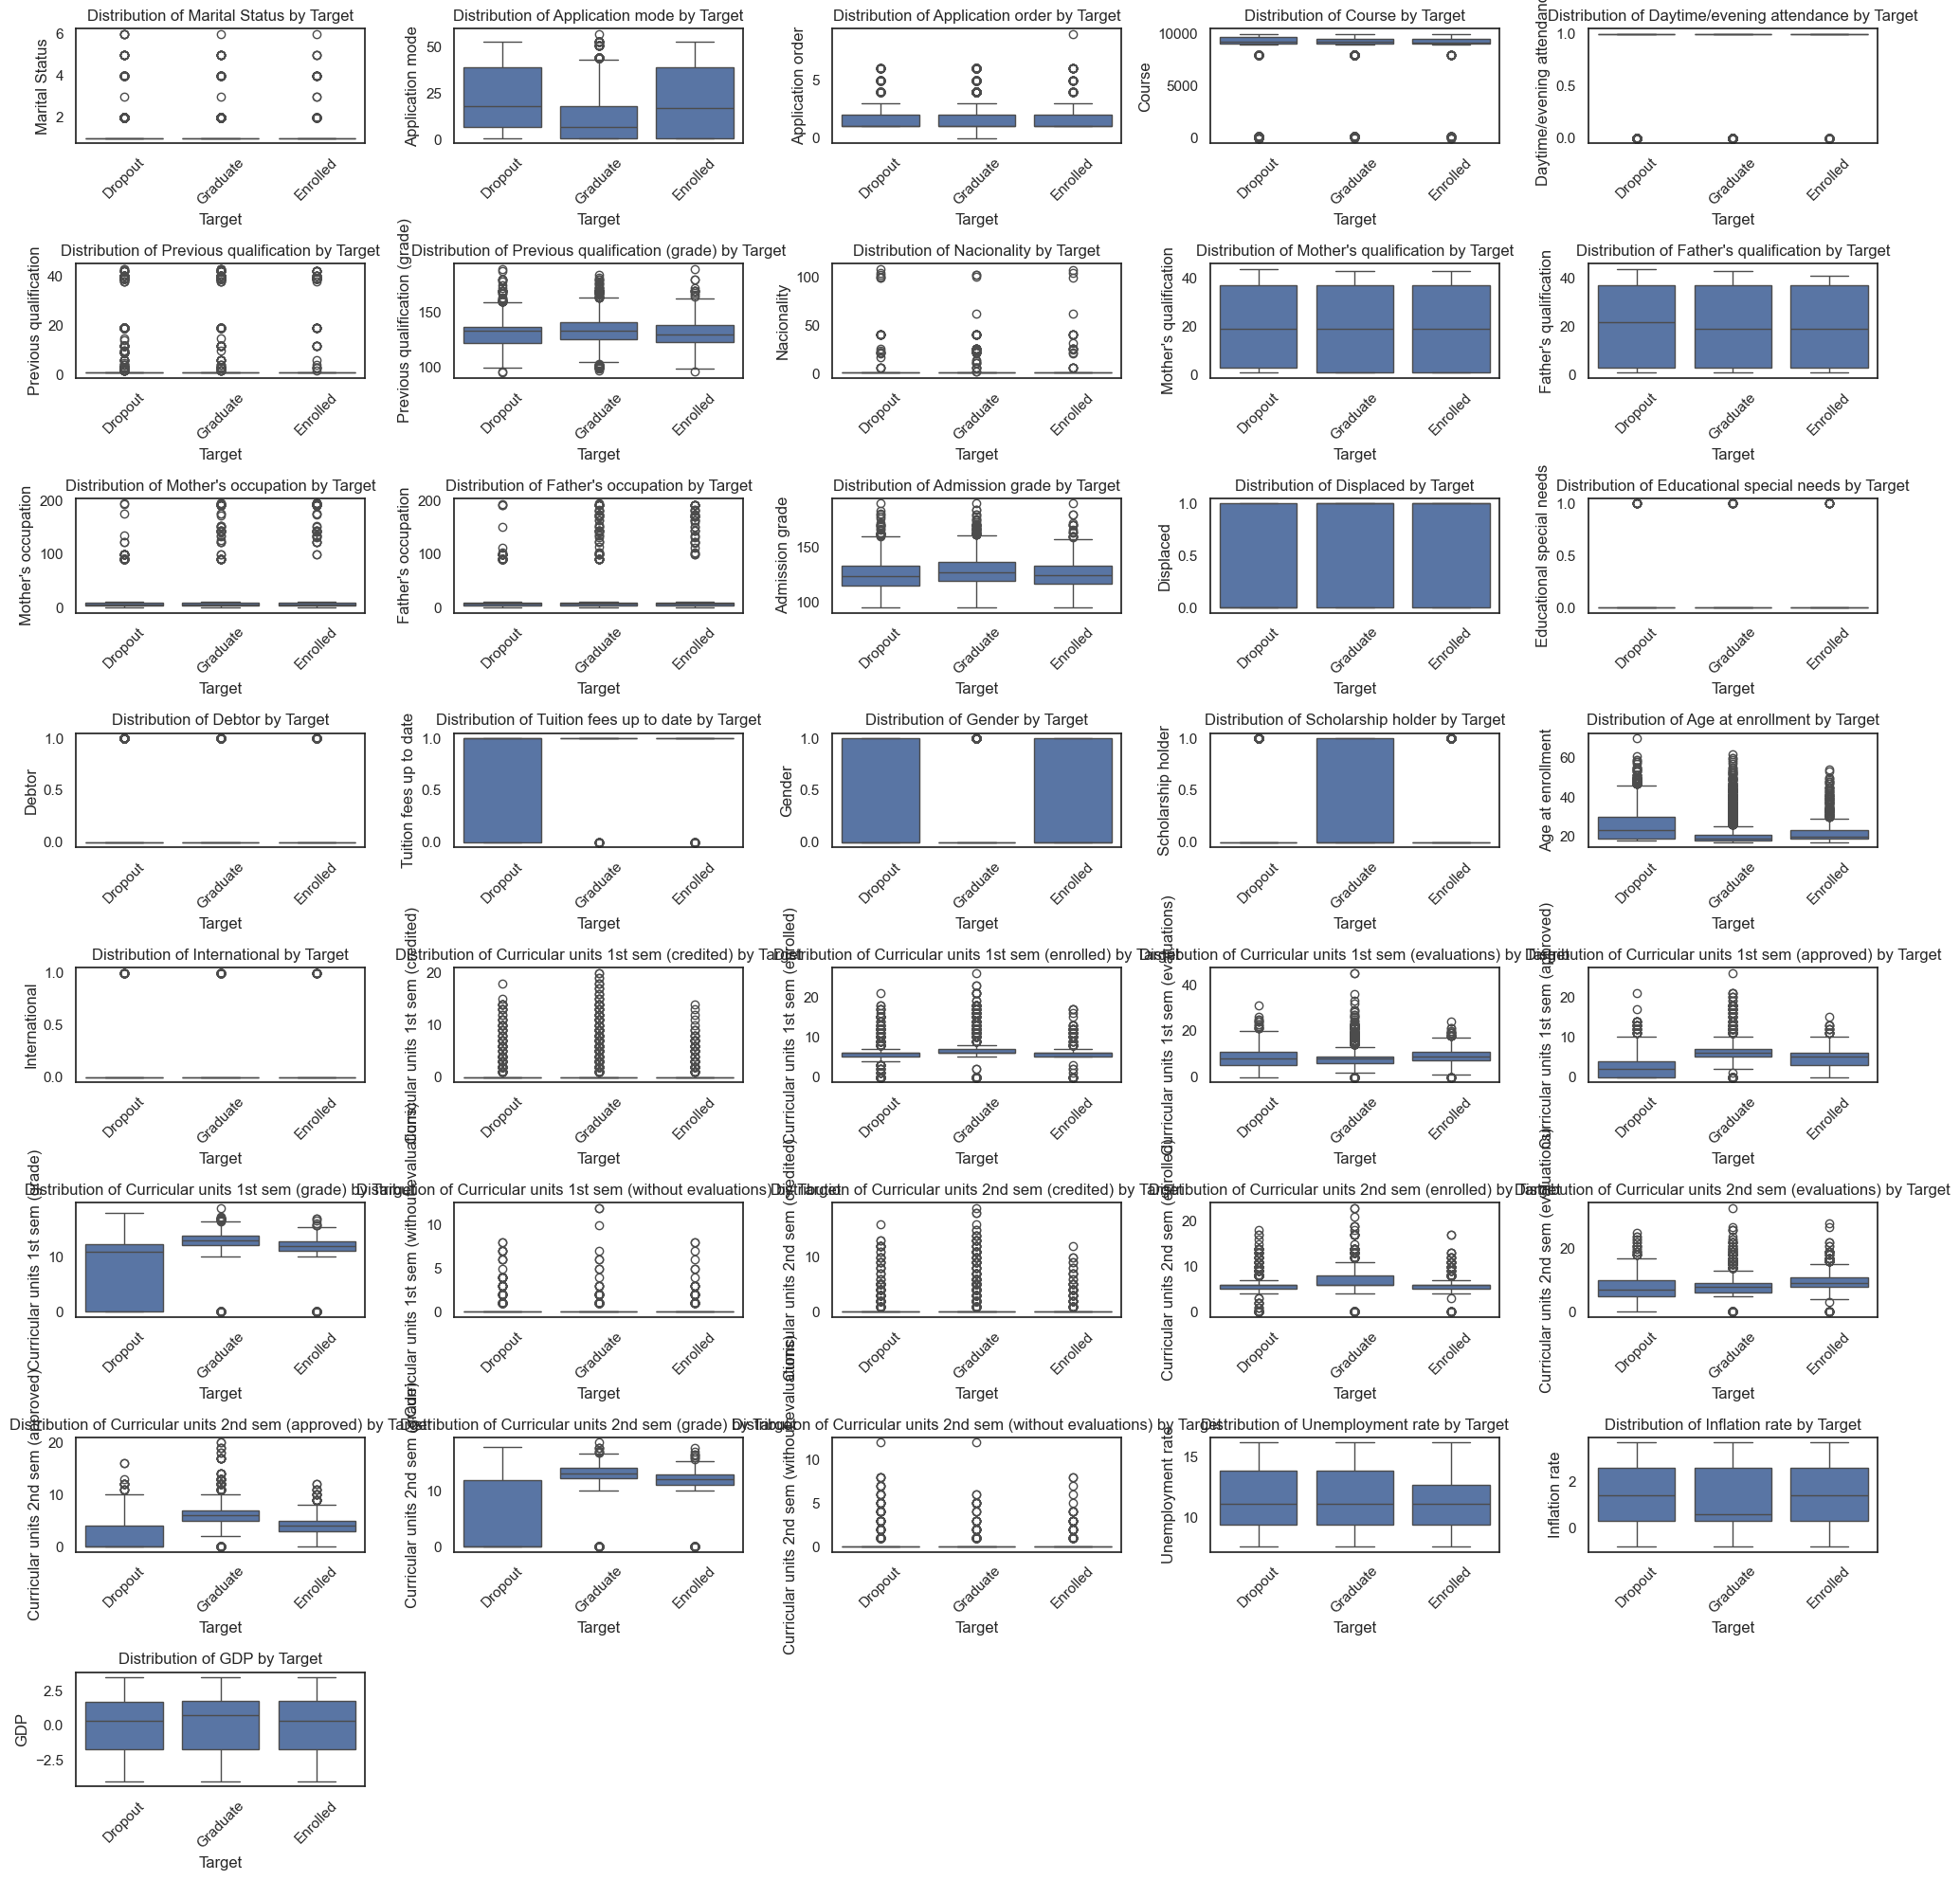

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of all features in the dataset
features = df.columns[:-1]  # Exclude the target column

# Set up the plotting grid
plt.figure(figsize=(20, 20))
for i, feature in enumerate(features, 1):
    plt.subplot(8, 5, i)  # Adjust this based on the number of features
    sns.boxplot(x='Target', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Target')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [21]:
df.columns

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [27]:
# Rename columns to match the correct names
df.rename(columns = {"Nacionality": "Nationality", 
                           "Mother's qualification": "Mother_qualification", 
                           "Father's qualification": "Father_qualification", 
                           "Mother's occupation": "Mother_occupation",
                           "Father's occupation": "Father_occupation", 
                           "Age at enrollment": "Age"}, inplace = True)

# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')

# List of categorical features (based on your column names)
categorical_features = [
    'Marital_Status', 'Application_mode', 'Application_order', 'Course',
    'Daytime/evening_attendance', 'Previous_qualification', 'Nationality',
    'Mother_qualification', 'Father_qualification', 'Mother_occupation',
    'Father_occupation', 'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International'
]
df['Target'] = df['Target'].apply(lambda x: 1 if x == 'Dropout' else 0)

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features)

# Check the result
df_encoded.head()


,Previous_qualification_(grade),Admission_grade,Age,Curricular_units_1st_sem_(credited),Curricular_units_1st_sem_(enrolled),Curricular_units_1st_sem_(evaluations),Curricular_units_1st_sem_(approved),Curricular_units_1st_sem_(grade),Curricular_units_1st_sem_(without_evaluations),Curricular_units_2nd_sem_(credited),...,Debtor_0,Debtor_1,Tuition_fees_up_to_date_0,Tuition_fees_up_to_date_1,Gender_0,Gender_1,Scholarship_holder_0,Scholarship_holder_1,International_0,International_1
0,122.0,127.3,20,0,0,0,0,0.000000,0,0,...,True,False,False,True,False,True,True,False,True,False
1,160.0,142.5,19,0,6,6,6,14.000000,0,0,...,True,False,True,False,False,True,True,False,True,False
2,122.0,124.8,19,0,6,0,0,0.000000,0,0,...,True,False,True,False,False,True,True,False,True,False
3,122.0,119.6,20,0,6,8,6,13.428571,0,0,...,True,False,False,True,True,False,True,False,True,False
4,100.0,141.5,45,0,6,9,5,12.333333,0,0,...,True,False,False,True,True,False,True,False,True,False


In [28]:
df_encoded.Target

0       1
1       0
2       1
3       0
4       0
       ..
4419    0
4420    1
4421    1
4422    0
4423    0
Name: Target, Length: 4424, dtype: int64

In [13]:
import numpy as np

In [29]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Calculate the correlations with the target variable
correlations_dummies = correlation_matrix['Target'].drop('Target').sort_values(ascending=False)

# Print the five highest correlations with the target variable
print("Five highest correlations with target (using dummies):")
print(correlations_dummies.head(15))

# Print the five lowest correlations with the target variable
print("\nFive lowest correlations with target (using dummies):")
print(correlations_dummies.tail(15))


Five highest correlations with target (using dummies):
Tuition_fees_up_to_date_0    0.429149
Age                          0.254215
Scholarship_holder_0         0.245354
Application_mode_39          0.231699
Debtor_1                     0.229407
Gender_1                     0.203983
Mother_qualification_34      0.155484
Mother_occupation_0          0.143891
Father_qualification_34      0.138755
Previous_qualification_19    0.133933
Father_occupation_0          0.118081
Application_mode_7           0.111978
Mother_occupation_90         0.110620
Displaced_0                  0.107232
Course_9991                  0.101295
Name: Target, dtype: float64

Five lowest correlations with target (using dummies):
Marital_Status_1                         -0.113859
Curricular_units_1st_sem_(enrolled)      -0.124635
Curricular_units_2nd_sem_(enrolled)      -0.141515
Previous_qualification_1                 -0.153128
Curricular_units_2nd_sem_(evaluations)   -0.154999
Course_9500                         

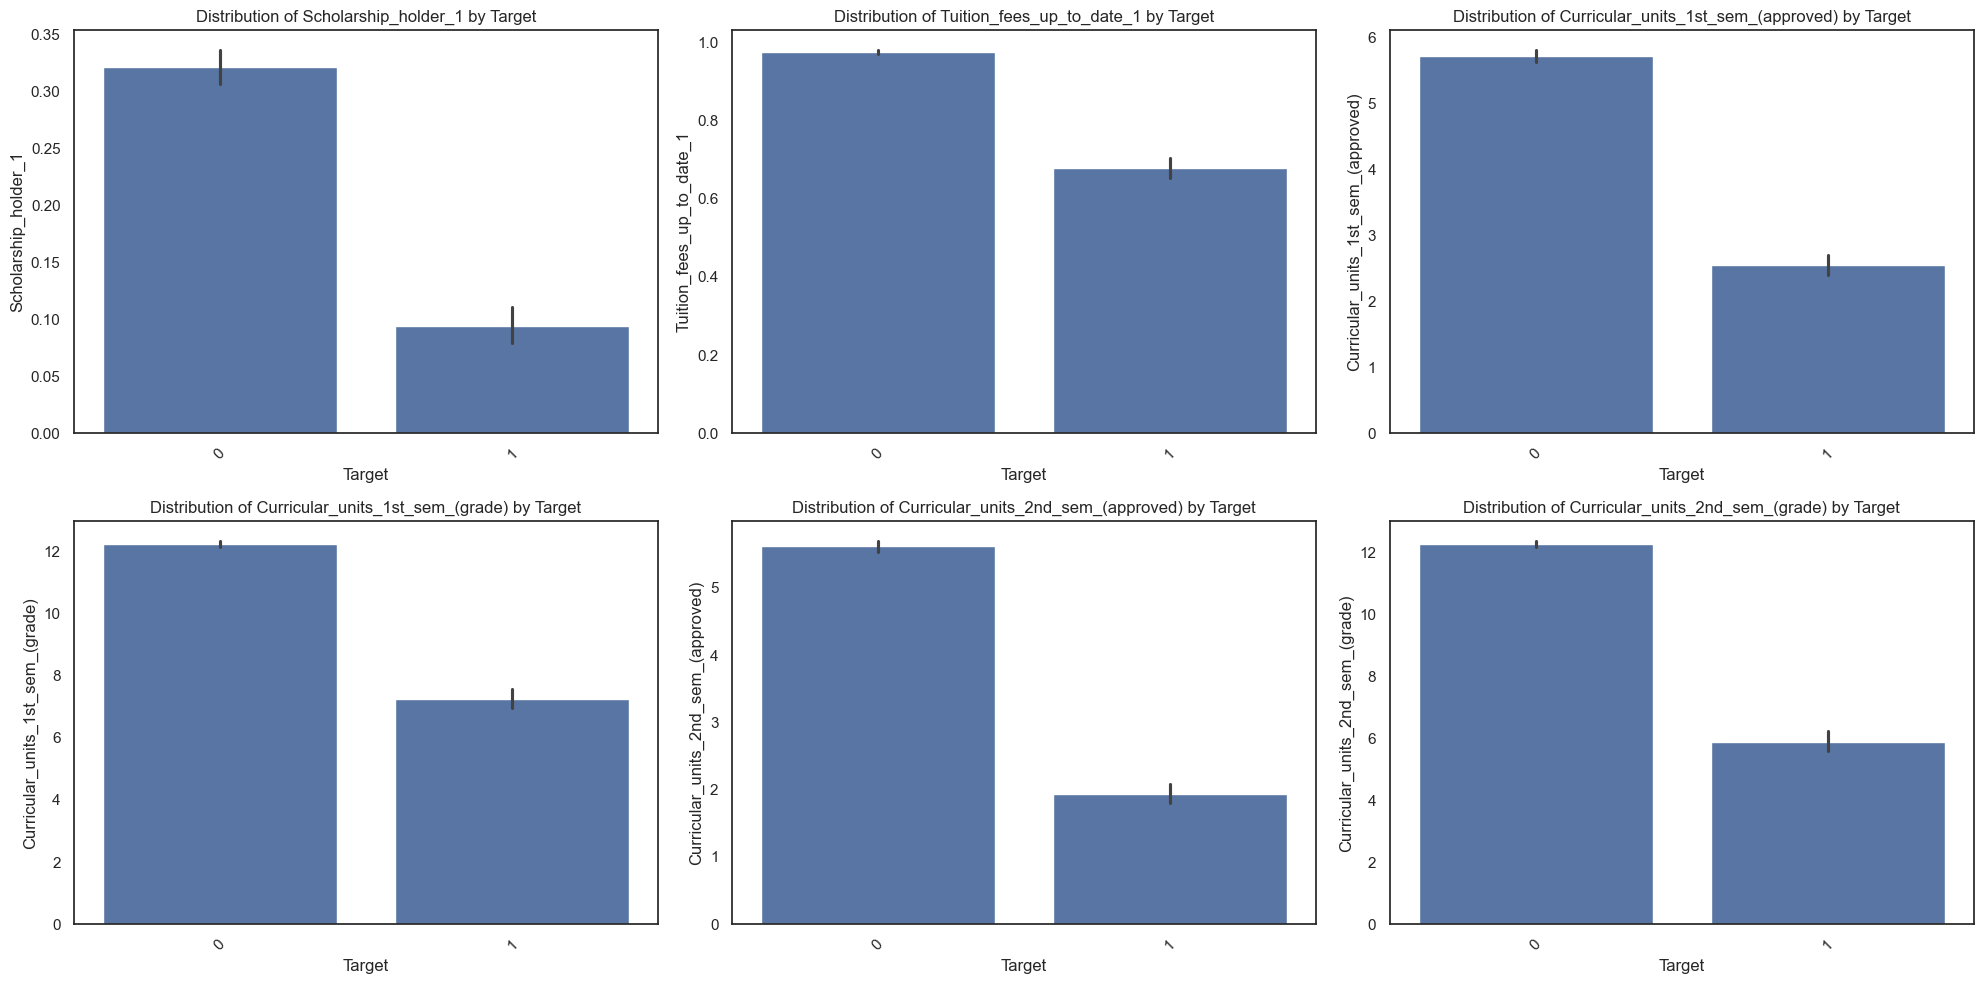

In [34]:
# Get the five features with the lowest correlation with the target variable
lowest_correlation_features = correlations_dummies.tail(6).index

# Set up the plotting grid
plt.figure(figsize=(20, 10))
for i, feature in enumerate(lowest_correlation_features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Target', y=feature, data=df_encoded)
    plt.title(f'Distribution of {feature} by Target')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

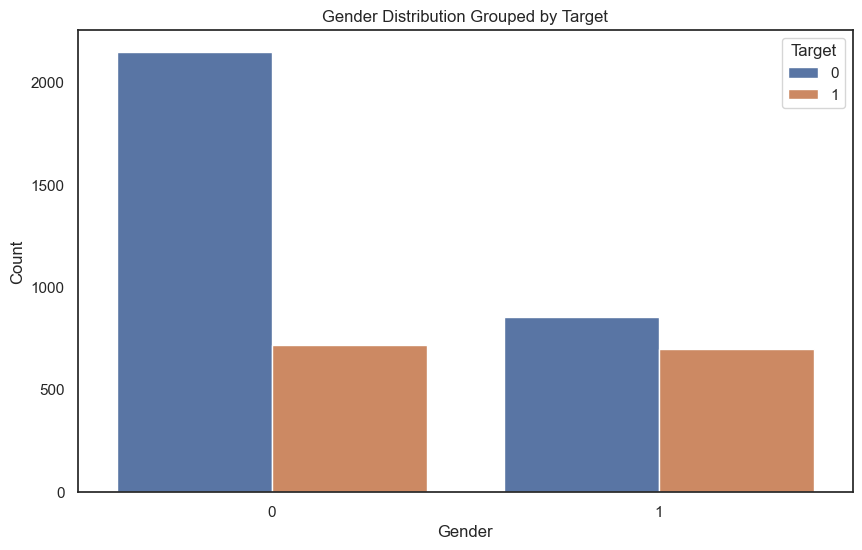

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Target', data=df)
plt.title('Gender Distribution Grouped by Target')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Target')
plt.show()